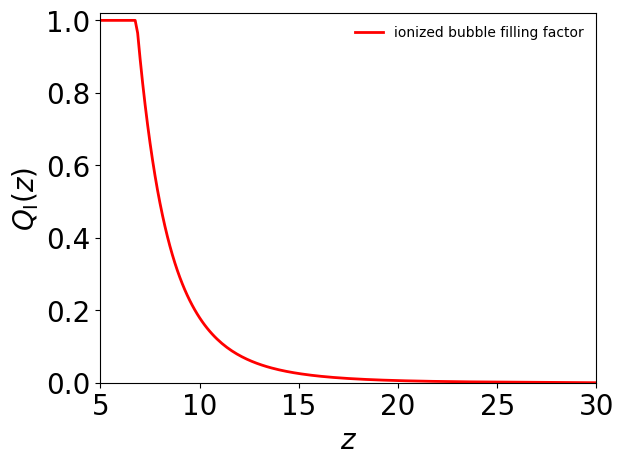

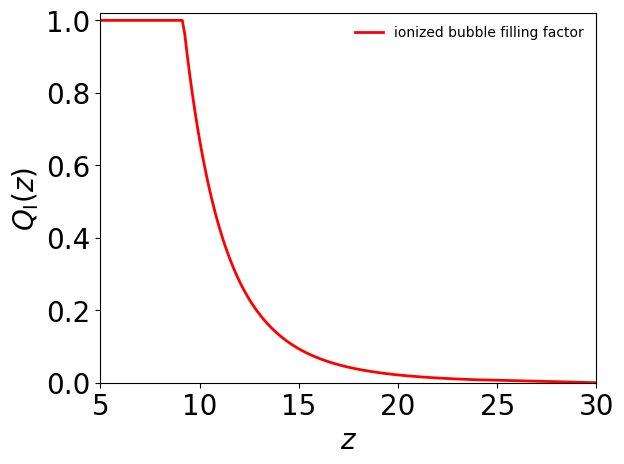

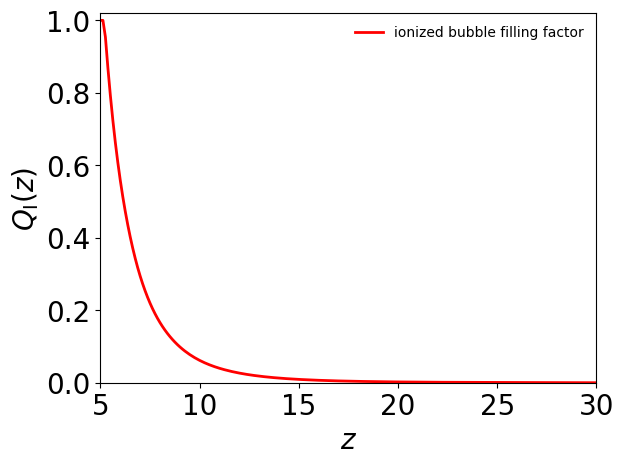

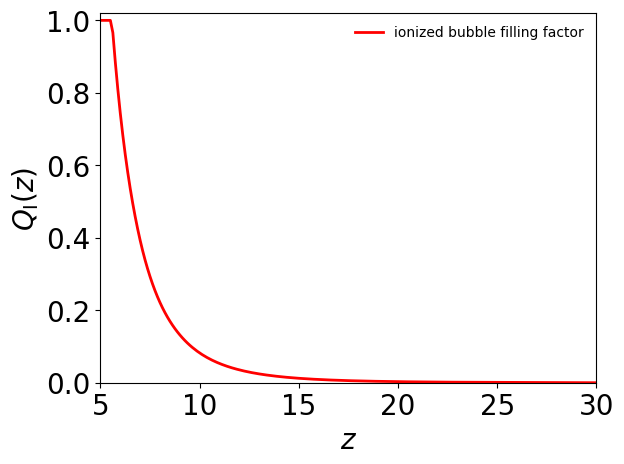

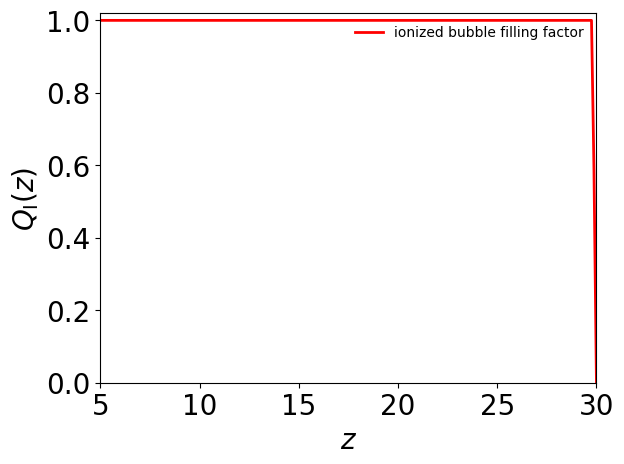

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def plot_QI(a, b, c, d, f_esc, clumping_factor, N_ion):
    # 定义物理常量和参数
    M_SUN = 1.9891e33
    Mpc = 3.08567758e24
    m_H = 1.6735575e-24
    yr = 31536000

    Omega_m = 0.32
    Omega_Lambda = 1 - Omega_m
    h = 0.67
    H0 = 100 * h

    n_H = 1.9e-7
    alpha_B = 2.5e-13

    # 定义函数
    def SFRD(z):
        return a * (1 + z) ** b / (1 + ((1 + z) / c) ** d)

    def Hz(z):
        return H0 * np.sqrt(Omega_m * (1 + z) ** 3 + Omega_Lambda)

    def dz_dt(z):
        return -(1 + z) * Hz(z) * 1e5 / Mpc

    def dQI_dz(z, QI):
        dot_n_ion = N_ion * SFRD(z) * M_SUN / yr / (Mpc ** 3) / m_H
        dQI_dt = f_esc * dot_n_ion / n_H - clumping_factor * alpha_B * n_H * (1 + z) ** 3 * QI
        return dQI_dt / dz_dt(z)

    plt.figure()
    t_eval = np.linspace(30.0, 5.0, 201)
    sol = solve_ivp(dQI_dz, [30.0, 5.0], [0.0], method='RK45', t_eval=t_eval)

    index = np.where(sol.y[0][:] > 1)[0]
    sol.y[0][index] = 1

    # 绘制结果
    plt.plot(sol.t, sol.y[0], linewidth=2, color='r', linestyle='-', label=r'ionized bubble filling factor')   

    # 设置坐标轴和图例
    ax = plt.gca()
    plt.xlim([5.0, 30.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel(r'$z$', fontsize=20)
    plt.ylabel(r'$Q_{\rm I}(z)$', fontsize=20)
    plt.setp(ax.get_xticklabels(), fontsize=20)
    plt.setp(ax.get_yticklabels(), fontsize=20)
    plt.legend(loc='upper right', frameon=False, fontsize=10)
    plt.show()

# 测试不同参数的情况
plot_QI(a=0.015, b=2.7, c=2.9, d=5.6, f_esc=0.5, clumping_factor=3.0, N_ion=4000.0)
plot_QI(a=0.020, b=3.0, c=3.5, d=6.0, f_esc=0.4, clumping_factor=2.5, N_ion=3500.0)
plot_QI(a=0.010, b=2.3, c=2.5, d=5.0, f_esc=0.6, clumping_factor=3.5, N_ion=4500.0)
plot_QI(a=0.010, b=2.3, c=2.5, d=5.0, f_esc=0.8, clumping_factor=3.5, N_ion=4500.0)
plot_QI(a=0.010, b=5, c=4, d=6, f_esc=0.8, clumping_factor=3.5, N_ion=4500.0)